In [1]:
import pyximport
pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy
from gammapy.maps import Map
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    GaussianSpatialModel,
    Models,
    FoVBackgroundModel,
)
import sys
sys.path.append('/home/katrin/Documents/nuisance_summary/')
from Dataset_Creation import sys_dataset
import Dataset_load 

In [2]:
dataset_asimov = Dataset_load.create_asimov()

In [3]:
biass = [-0.1, 0.0, 0.1]
bias_assumed = 0.1
sigmass = [0]


In [4]:
def create_dataset(b, s):
    sys_d_cor = sys_dataset(dataset_asimov= dataset_asimov,
                        shift = 0,
                        tilt = 0,
                        bias = b, 
                        resolution = s,
                        rnd = False,
                        e_reco_creation=10)
    dataset_conv = sys_d_cor.create_dataset()
    dataset_conv_N = sys_d_cor.create_dataset_N(10)
    dataset_conv_N.models.parameters['resolution'].frozen  = True
    dataset_conv_N.e_reco_n = 10

    zero = 1e-12
    penalising_invcovmatrix = np.zeros((4,4))
    if b ==0 :
        b_ = zero
    else:
        b_ = b
    np.fill_diagonal(penalising_invcovmatrix, [1/bias_assumed**2, 1/zero**2, 1/zero**2, 1/zero**2])
    dataset_conv_N.penalising_invcovmatrix = penalising_invcovmatrix
    #dataset_conv_N.irf_model.eff_area_model = None
    #dataset_conv_N.irf_model.eff_area_model = None
    return dataset_conv, dataset_conv_N

datasets_conv =[]
datasets_conv_N =[]

for b in biass:
    dataset_conv, dataset_conv_N  = create_dataset(b, sigmass[0])
    datasets_conv.append(dataset_conv)
    datasets_conv_N.append(dataset_conv_N)
    


compute exposure
compute edisp
-0.1
evaluate -0.1
compute exposure
compute edisp
-0.1
evaluate -0.1
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.1
evaluate 0.1
compute exposure
compute edisp
0.1
evaluate 0.1


In [5]:
print(dataset_conv_N)

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
MapDataset
----------

  Name                            : dataset N 

  Total counts                    : 361333 
  Total background counts         : 360331.31
  Total excess counts             : 1001.76

  Predicted counts                : 361330.66
  Predicted background counts     : 360331.34
  Predicted excess counts         : 999.32

  Exposure min                    : 2.07e-01 m2 s
  Exposure max                    : 2.41e+11 m2 s

  Number of total bins            : 540000 
  Number of fit bins              : 180191 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : -753577.25

  Number of models                : 3 
  Number of parameters            : 16
  Number of free parameters       : 7

  Component 0: SkyModel
  
    Name                      : Source
    Datasets names            : None
    Spectral mo

In [6]:
energy = datasets_conv[0].counts.geom.axes[0].center.value
energy_bounds = (energy[0], energy[-1] ) * u.TeV
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


colors_standard = ['darkmagenta', 'darkred', 'darkolivegreen', 'darkred']
colors_nui = ['cornflowerblue', 'navy', 'darkolivegreen', 'darkred']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_standard = 'darkmagenta'; color_nui = 'royalblue'
color_standard_ = 'darkred'; color_nui_ = 'navy'

In [7]:
def sum_e (data):
    return data.sum(axis=2).sum(axis=1)

eaxis_standard = dataset_asimov.geoms['geom'].axes[0]

compute edisp
0.0
evaluate 0.0
compute exposure


<WCSAxesSubplot: >

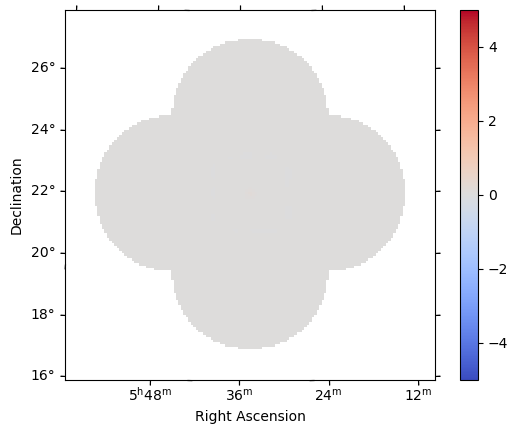

In [8]:
dataset_conv_N.plot_residuals_spatial()

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure


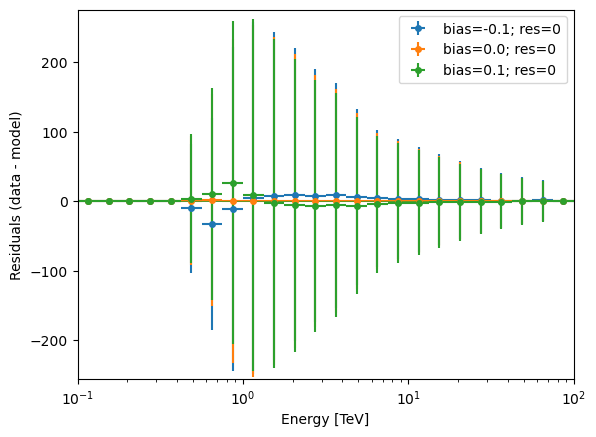

In [9]:
fig, ax = plt.subplots()
i = 0

for b in biass:
    for s in sigmass:
        d = datasets_conv_N[i]
        d.plot_residuals_spectral(ax =ax, color= colors[i], 
                    label = f"bias={b}; res={s}")
        #d = datasets_conv_N_fine[i]
        #d.plot_residuals_spectral(ax =ax, color= colors[1], 
        #            label = f"bias={b}; res={s}")
        i += 1
ax.legend()

fig.savefig(f"plots/2_Residual_pre_fit.svg")

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure


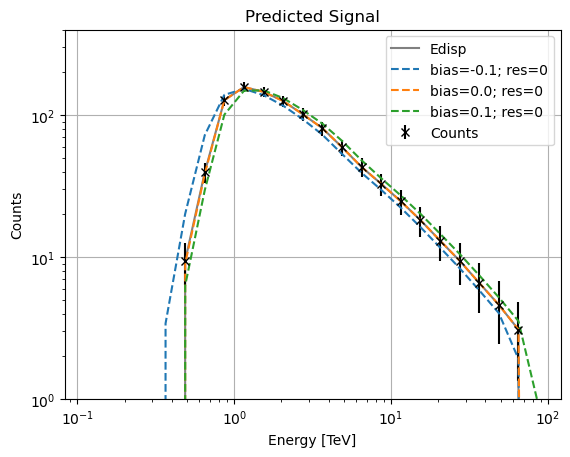

In [10]:
import matplotlib.pyplot as plt

# Your data processing code here

plt.title("Predicted Signal")
i = 0 
fmts = ['o', 'x', '--', ':']
colors = ['orange', 'red', 'tab:blue', 'green']
plt.plot(energy,sum_e(dataset_asimov.counts.data-dataset_asimov.background.data),
         label = "Edisp", color = 'grey')
npreds_pre_fit = []
npreds_pre_fit_N = []
npreds_pre_fit_N_fine = []
plt.errorbar(energy, sum_e(d.counts.data-d.background.data), 
             yerr = np.sqrt(sum_e(d.counts.data-d.background.data)),
            fmt = 'x', label = "Counts", color = 'black')

for b in biass:
    for s in sigmass:
        npreds_pre_fit.append( sum_e(datasets_conv[i].npred_signal().data))
        npreds_pre_fit_N.append( sum_e(datasets_conv_N[i].npred_signal().data))
        
        plt.plot( energy, sum_e(datasets_conv[i].npred_signal().data),
                 '--', label = f"bias={b}; res={s}",)# color = colors[i])
        #plt.plot( sum_e(datasets_conv_N[i].npred_signal().data),
        #         'x', label = f"bias={b}; res={s}", color = colors[i])
        #plt.plot( sum_e(datasets_conv_N_fine[i].npred_signal().data),
        #         '--', label = f"bias={b}; res={s}", color = colors[i])
        i += 1
        
plt.ylim(1e0, 4e2)
plt.loglog()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("Energy [TeV]")
plt.ylabel("Counts")
plt.grid(True)
fig = plt.gcf()
fig.savefig(f"plots/2_Npred.svg")


corr
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.536e+05                 │              Nfcn = 497              │
│ EDM = 0.000104 (Goal: 2e-06)     │            time = 5.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────────────┬───────────┬───────────┬────────────┬────────────┬────────

compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evalu

compute edisp
0.027276138672034288
evaluate 0.027276138672034288
compute exposure
compute edisp
0.022291473547765915
evaluate 0.022291473547765915
compute exposure
compute edisp
0.01113044551729037
evaluate 0.01113044551729037
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
evaluate 0.01730680842349754
compute exposure
compute edisp
0.01730680842349754
ev

compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.0546284499609275
evaluate 0.0546284499609275
compute exposure
compute edisp
0.05674946672996285
evaluate 0.05674946672996285
compute exposure
compute edisp
0.05250743319189215
evaluate 0.05250743319189215
compute exposure
compute edisp
0.05505265331473457
evaluate 0.05505265331473457
compute exposure
compute edisp
0.05420424660712043
evaluate 0.05420424660712043
compute exposure
compute edisp
0.054713290631688914
evaluate 0.0547132906

compute edisp
0.05304143400226632
evaluate 0.05304143400226632
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evalua

compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evalua

compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evalua

compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.0549678943327299
evaluate 0.0549678943327299
compute exposure
compute edisp
0.054185983087229855
evaluate 0.054185983087229855
compute exposure
compute edisp
0.054655129834529886
evalu

compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.055000513850234904
evaluate 0.055000513850234904
compute exposure
compute edisp
0.054153363569724854
evaluate 0.054153363569724854
compute exposure
compute edisp
0.054661653738030884
evaluate 0.054661653738030884
compute exposure
compute edisp
0.054492223681928874
evaluate 0.054492223681928874
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.0545769387099798

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.42387228729048754
evaluate 0.42387228729048754
compute exposure
compute edisp
-0.42387228729048754
evaluate -0.42387228729048754
compute exposure
compute edisp
0.04238722872904876
evaluate 0.04238722872904876
compute exposure
compute edisp
-0.04238722872904876
evaluate -0.04238722872904876
compute exposure
compute edisp
0.014855035348976598
evaluate 0.014855035348976598
compute exposure
compute edisp
-0.014855035348976598
evaluate -0.014855035348976598
compute exposure
compute edisp
0.010540922908275388
evaluate 0.010540922908275388
compute exposure
compute edisp
-0.010540922908275388
evaluate -0.010540922908275388
compute exposure
compute edisp
0.04238723063628969
evaluate 0.04238723063628969
compute exposure
compute edisp
-0.04238723063628969
evaluate -0.04238723063628969
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute

compute edisp
0.015704685789432505
evaluate 0.015704685789432505
compute exposure
compute edisp
-0.01397590745254739
evaluate -0.01397590745254739
compute exposure
compute edisp
0.000864389168442558
evaluate 0.000864389168442558
compute exposure
compute edisp
0.000864389168442558
evaluate 0.000864389168442558
compute exposure
compute edisp
0.0009329511486911191
evaluate 0.0009329511486911191
compute exposure
compute edisp
0.0008831863818274741
evaluate 0.0008831863818274741
compute exposure
compute edisp
0.0008718274519182039
evaluate 0.0008718274519182039
compute exposure
compute edisp
0.0008676649095553723
evaluate 0.0008676649095553723
compute exposure
compute edisp
0.0008658928069604532
evaluate 0.0008658928069604532
compute exposure
compute edisp
0.0008650937880803963
evaluate 0.0008650937880803963
compute exposure
compute edisp
0.0008647218106623504
evaluate 0.0008647218106623504
compute exposure
compute edisp
0.0008645480218916796
evaluate 0.0008645480218916796
compute exposure


compute edisp
-0.0008310653805571513
evaluate -0.0008310653805571513
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
0.043251654300926215
evaluate 0.043251654300926215
compute exposure
compute edisp
0.0008644238379614394
evaluate 0.0008644238379614394
compute exposure
compute edisp
0.0008644238379614394
evaluate 0.0008644238379614394
compute exposure
compute edisp
0.0008644238379614394
evaluate 0.0008644238379614394
compute exposure
compute edisp
0.0008644238379614394
evaluate 0.0008644238379614394
compute e

compute edisp
0.016074368207675403
evaluate 0.016074368207675403
compute exposure
compute edisp
-0.016074368207675403
evaluate -0.016074368207675403
compute exposure
compute edisp
0.014578583940878296
evaluate 0.014578583940878296
compute exposure
compute edisp
-0.014578583940878296
evaluate -0.014578583940878296
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute expos

compute edisp
-0.0397998080666005
evaluate -0.0397998080666005
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.039954662235945744
evaluate -0.039954662235945744
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0.04022578890000755
evaluate -0.04022578890000755
compute exposure
compute edisp
-0

compute edisp
-0.035982368694269885
evaluate -0.035982368694269885
compute exposure
compute edisp
-0.045749234345722346
evaluate -0.045749234345722346
compute exposure
compute edisp
-0.03988911495485087
evaluate -0.03988911495485087
compute exposure
compute edisp
-0.04184248808514136
evaluate -0.04184248808514136
compute exposure
compute edisp
-0.040670464206967065
evaluate -0.040670464206967065
compute exposure
compute edisp
-0.04106113883302517
evaluate -0.04106113883302517
compute exposure
compute edisp
-0.040865801519996116
evaluate -0.040865801519996116
compute exposure
compute edisp
-0.040865801519996116
evaluate -0.040865801519996116
compute exposure
compute edisp
-0.040865801519996116
evaluate -0.040865801519996116
compute exposure
compute edisp
-0.040865801519996116
evaluate -0.040865801519996116
compute exposure
compute edisp
-0.040865801519996116
evaluate -0.040865801519996116
compute exposure
compute edisp
-0.040865801519996116
evaluate -0.040865801519996116
compute exposur

compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.024334403573275817
evaluate -0.024334403573275817
compute exposure
compute edisp
-0.05722491002991523
evaluate -0.05722491002991523
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exposure
compute edisp
-0.040779656801595524
evaluate -0.040779656801595524
compute exp

compute edisp
-0.028676922372033915
evaluate -0.028676922372033915
compute exposure
compute edisp
-0.006399416215814408
evaluate -0.006399416215814408
compute exposure
compute edisp
-0.02464202336294189
evaluate -0.02464202336294189
compute exposure
compute edisp
-0.009208808224617247
evaluate -0.009208808224617247
compute exposure
compute edisp
-0.02183263135413905
evaluate -0.02183263135413905
compute exposure
compute edisp
-0.011127439991573772
evaluate -0.011127439991573772
compute exposure
compute edisp
-0.019913999587182526
evaluate -0.019913999587182526
compute exposure
compute edisp
-0.012454362346534867
evaluate -0.012454362346534867
compute exposure
compute edisp
-0.01858707723222143
evaluate -0.01858707723222143
compute exposure
compute edisp
-0.015520719789378148
evaluate -0.015520719789378148
compute exposure
compute edisp
-0.015520719789378148
evaluate -0.015520719789378148
compute exposure
compute edisp
-0.017957350936586926
evaluate -0.017957350936586926
compute exposur

compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
0.0012684773130173833
evaluate 0.0012684773130173833
compute exposure
compute edisp
-0.03387120962128615
evaluate -0.03387120962128615
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exposure
compute edisp
-0.016301366154134384
evaluate -0.016301366154134384
compute exp

compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
0.015478741618081904
evaluate 0.015478741618081904
compute exposure
compute edisp
-0.042369050407827256
evaluate -0.042369050407827256
compute exposure
compute edisp
-0.0014507233457766566
evaluate -0.0014507233457766566
compute exposure
compute edisp
-0.025439585443968696
evaluate -0.025439585443968696
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.016013326650138417
evaluate -0.016013326650138417
compute e

compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute e

compute edisp
-0.011328379241704715
evaluate -0.011328379241704715
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
compute edisp
-0.011328379241704715
evaluate -0.011328379241704715
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.536e+05                 │              Nfcn = 851              │
│ EDM = 0.0106 (Goal: 2e-06)       │           time = 210.1 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below cal

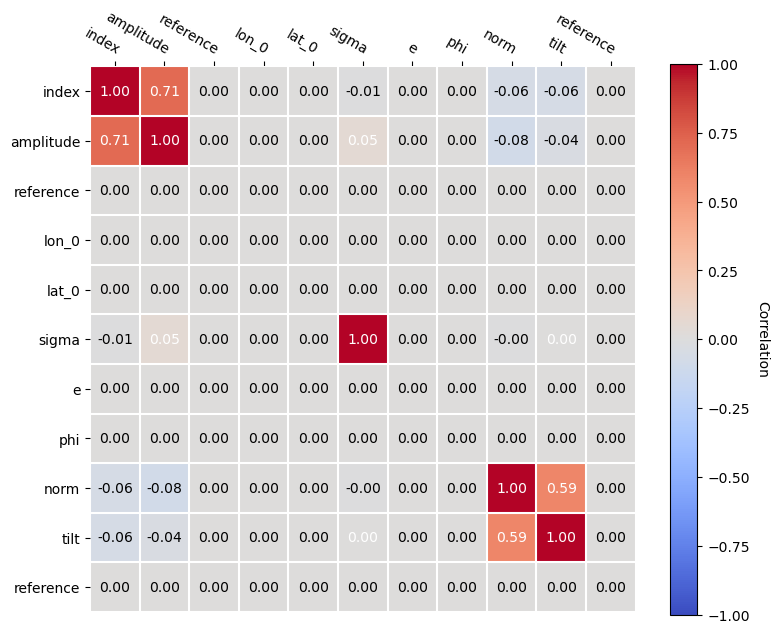

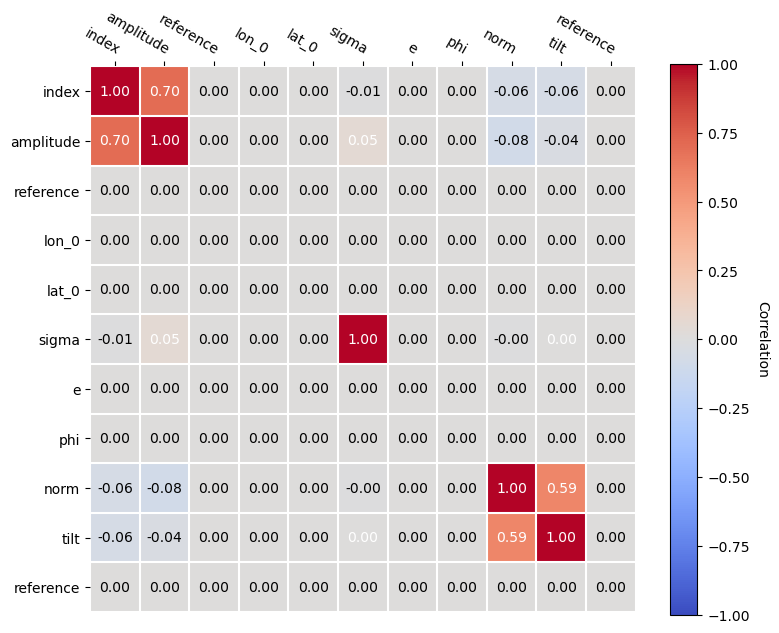

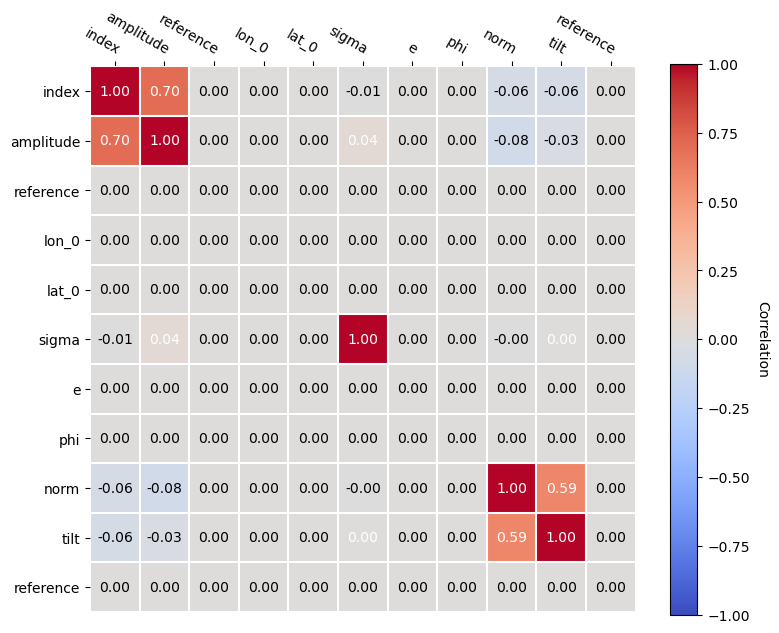

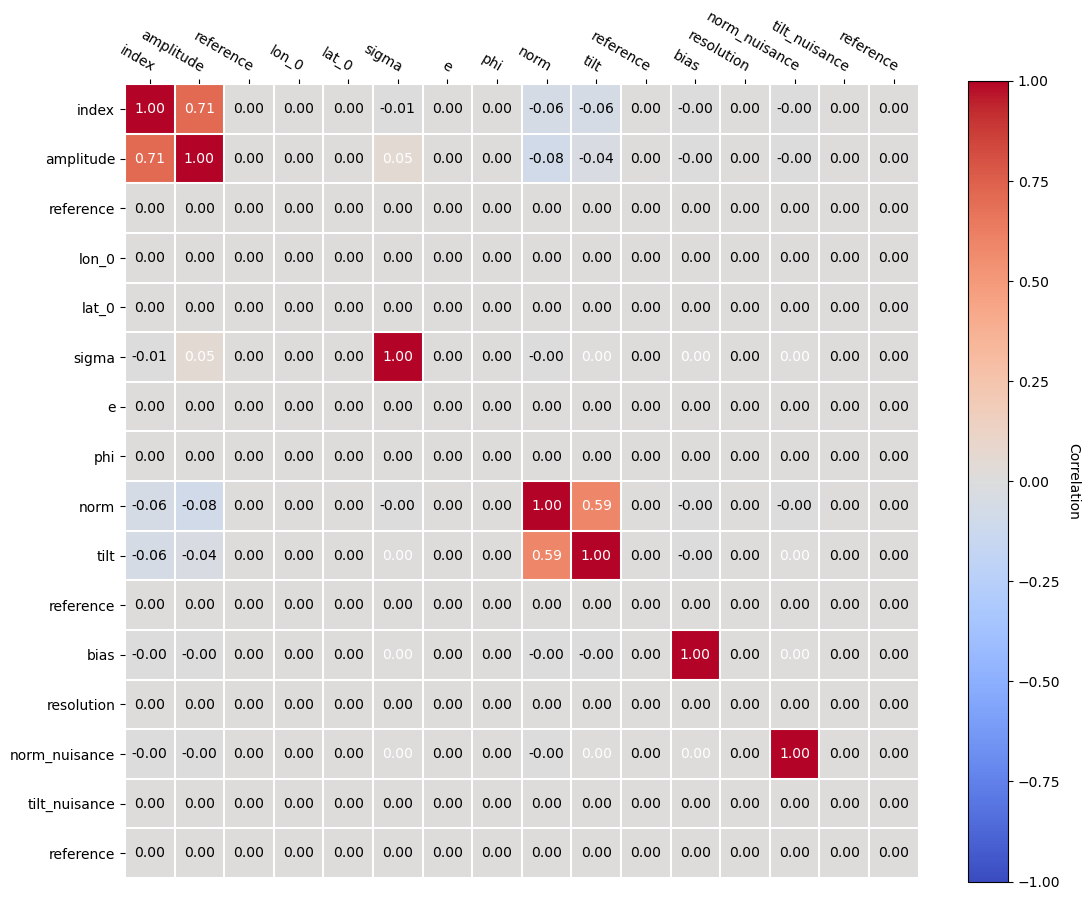

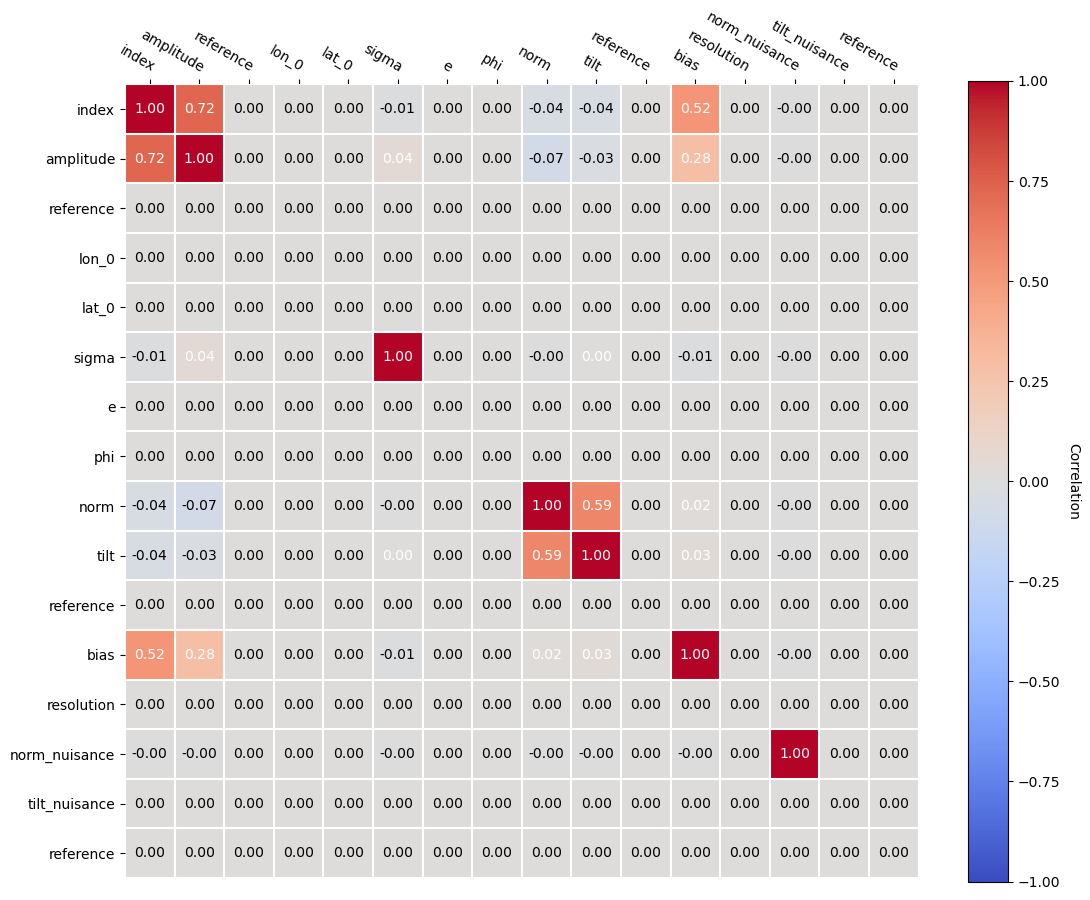

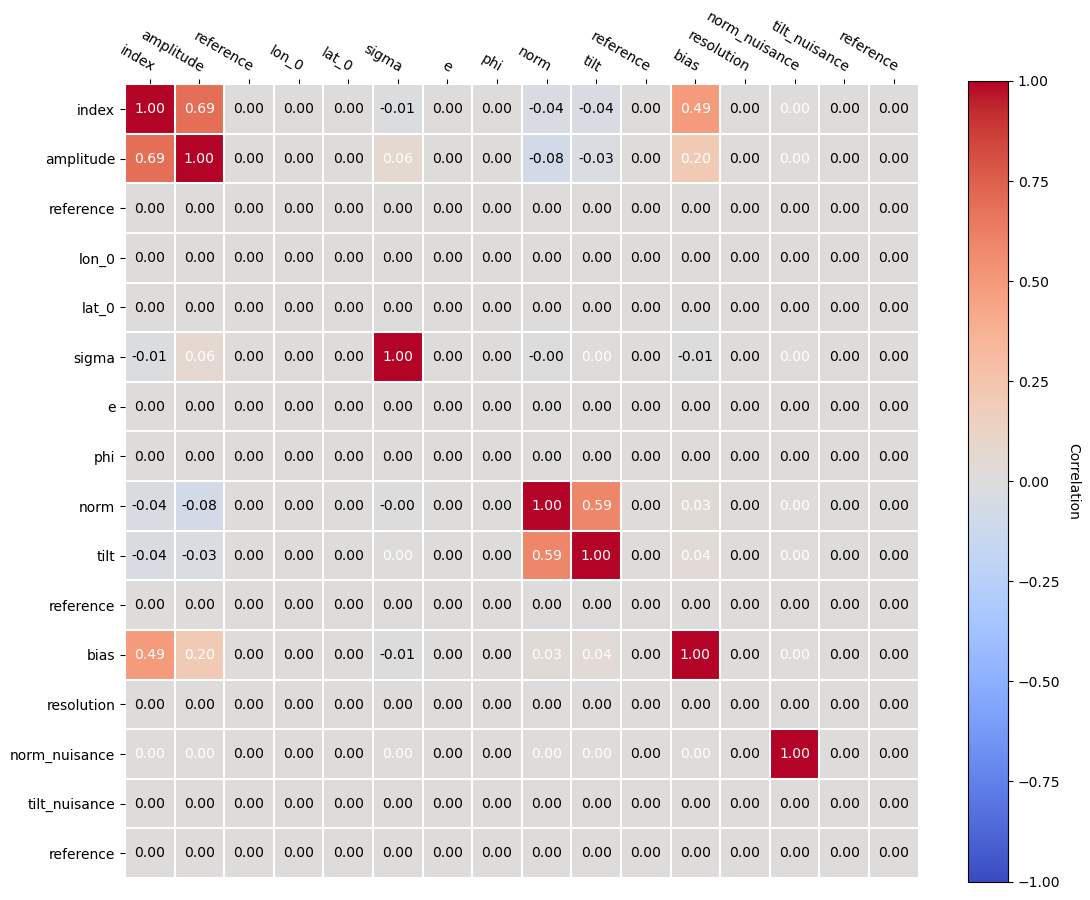

In [11]:
%%time
fitting = 1

if fitting:

    print("corr")
    for d in datasets_conv:
        fit_cor = Fit(store_trace=True)
        minuit_opts = {"tol": 0.001, "strategy": 2}
        fit_cor.optimize_opts = minuit_opts
        result_cor = fit_cor.run(d)
        d.models.covariance = fit_cor.covariance(d).matrix
        d.models.covariance.plot_correlation()
        print(fit_cor.minuit)

    for d in datasets_conv_N:
        fit_cor_N = Fit(store_trace=True)
        fit_cor_N.optimize_opts = {"tol": 0.001, "strategy": 2}
        result_cor_N = fit_cor_N.run(d)
        d.models.covariance = fit_cor_N.covariance(d).matrix
        d.models.covariance.plot_correlation()
        print(fit_cor_N.minuit)
    
    print("saving")
    for i, d in enumerate(datasets_conv):
        path = f'data/2_model_{biass[i]}_sigma_0.yml'
        d.models.write(path,overwrite=True)
    for i, d in enumerate(datasets_conv_N):
        path = f'data/2_model_nui_{biass[i]}_sigma_0.yml'
        d.models.write(path,overwrite=True)
        
else:
    print("read")
    for i, d in enumerate(datasets_conv):
        path = f'data/2_model_{biass[i]}_sigma_0.yml'
        datasets_conv[i] = Dataset_load.load_dataset_N(d, path)        
    print("read nui")
    for i, d in enumerate(datasets_conv_N):
        path = f'data/2_model_nui_{biass[i]}_sigma_0.yml'
        datasets_conv_N[i] = Dataset_load.load_dataset_N(d, path)        
        
    



In [12]:

colors_standard = ['darkmagenta', 'darkred', 'darkolivegreen', 'darkred']
colors_nui = ['cornflowerblue', 'navy', 'darkolivegreen', 'darkred']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_standard = 'darkmagenta'; color_nui = 'royalblue'
color_standard_ = 'darkred'; color_nui_ = 'navy'

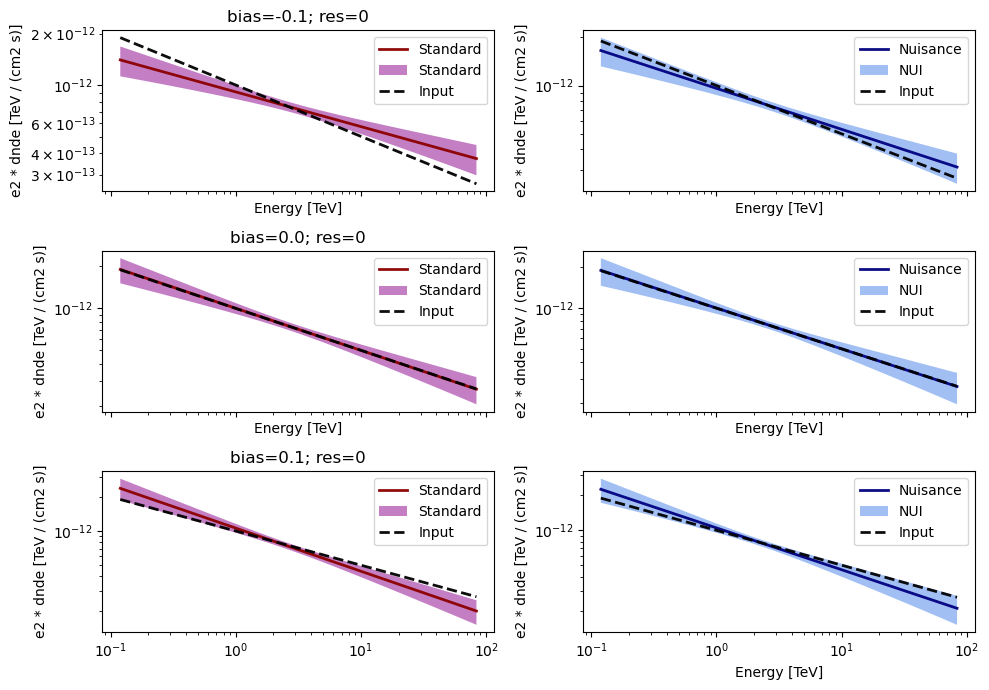

In [13]:


fig,axss = plt.subplots(len(biass),2, sharex = True, sharey=False, figsize = (10,7
                                                                   ))
#axs = [axs]
i =0; ii =0
for b in biass:
    for s in sigmass:
        ii = 0
        axs = axss[i]
        d = datasets_conv_N[i]
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii+1],
                                             
                                        color=colors_nui[ii+1],
                                                                 label= f"Nuisance",
                                                                alpha = 0.95,
                                                               linestyle='-', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii+1],
                                                               facecolor=colors_nui[ii],
                                                                 label="NUI",
                                                                alpha = 0.6)
        d = datasets_conv[i]
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii],
                                                               color=colors_standard[ii+1],
                                                                 label= f"Standard",
                                                                alpha = 0.95,
                                                               linestyle='-', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii],
                                                               facecolor=colors_standard[ii],
                                                                 label="Standard",
                                                                alpha = 0.5)
        
        axs[0].set_title(f"bias={b}; res={s}")
        i +=1
        ii +=1
for ass in axss:
    for a in ass:
        dataset_asimov.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = a,
                                                               color='black',
                                                                 label="Input",
                                                                alpha = 0.95,
                                                               linestyle='dashed', linewidth= 2)  
        a.legend()
    
ylim = axs[0].get_ylim()
axs[0].set_xlabel('')
plt.tight_layout()
fig.savefig(f"plots/2_Best_fit_Spectrum.svg")


In [14]:
color_standard = 'mediumvioletred'; color_standard_e = 'palevioletred' #mediumvioletred
color_nui = 'midnightblue'; color_nui_e = 'cornflowerblue'
color_input = 'darkorange'
color_rnd = 'darkgreen'


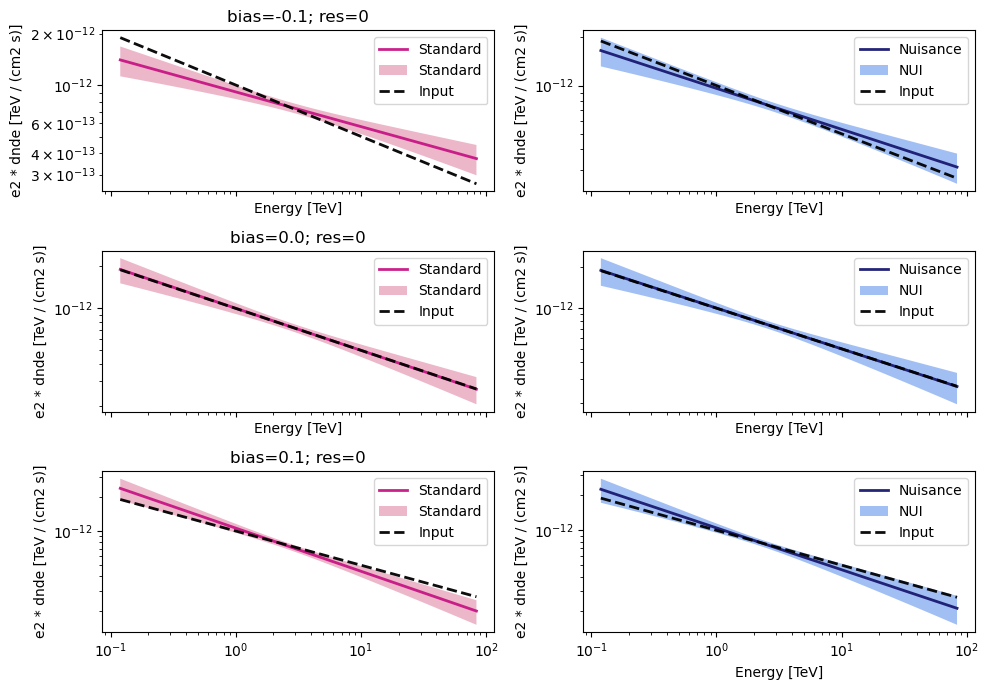

In [15]:


fig,axss = plt.subplots(len(biass),2, sharex = True, sharey=False, figsize = (10,7
                                                                   ))
#axs = [axs]
i =0; ii =0
for b in biass:
    for s in sigmass:
        ii = 0
        axs = axss[i]
        d = datasets_conv_N[i]
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii+1],
                                                            color=color_nui,
                                                                 label= f"Nuisance",
                                                                alpha = 0.95,
                                                               linestyle='-', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii+1],
                                                               facecolor=color_nui_e,
                                                                 label="NUI",
                                                                alpha = 0.6)
        d = datasets_conv[i]
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii],
                                                               color=color_standard,
                                                                 label= f"Standard",
                                                                alpha = 0.95,
                                                               linestyle='-', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii],
                                                               facecolor=color_standard_e,
                                                                 label="Standard",
                                                                alpha = 0.5)
        
        axs[0].set_title(f"bias={b}; res={s}")
        i +=1
        ii +=1
for ass in axss:
    for a in ass:
        dataset_asimov.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = a,
                                                               color='black',
                                                                 label="Input",
                                                                alpha = 0.95,
                                                               linestyle='dashed', linewidth= 2)  
        a.legend()
    
ylim = axs[0].get_ylim()
axs[0].set_xlabel('')
plt.tight_layout()
fig.savefig(f"plots/2_Best_fit_Spectrum.svg")


compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure


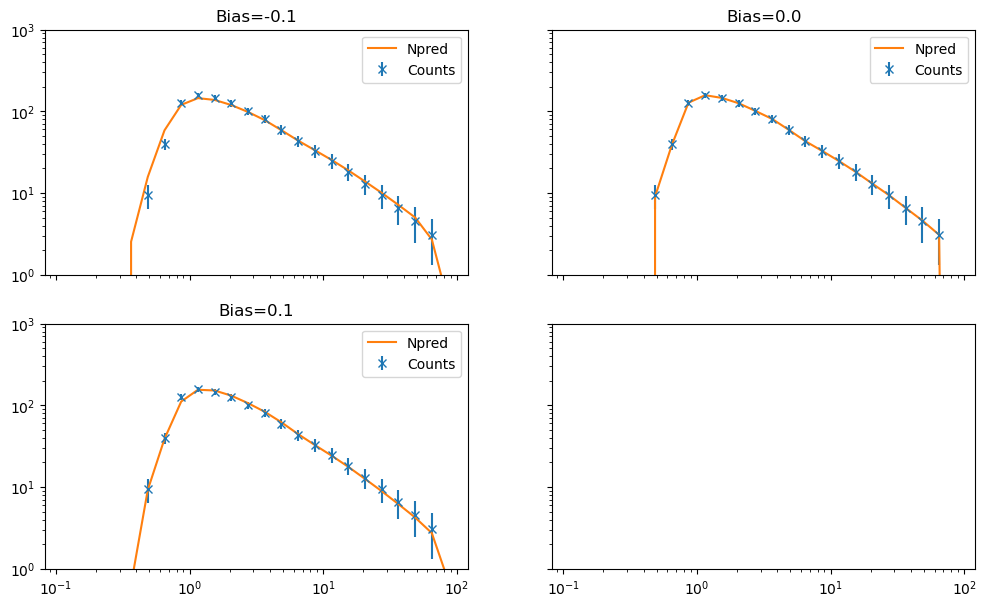

In [16]:
fig,axs = plt.subplots(2,2, sharex = True, sharey=True, figsize = (12,7))
axs = axs.flatten()
i =0; ii =0
for b in biass:
    for s in sigmass:
        d = datasets_conv_N[ii]
        axs[ii].errorbar(energy, sum_e(d.counts.data-d.background.data), 
                     yerr = np.sqrt(sum_e(d.counts.data-d.background.data)),
                    fmt = 'x', label = "Counts")

        axs[ii].plot(energy, sum_e(d.npred_signal().data), label = "Npred")
        axs[ii].loglog()
        axs[ii].legend()
        axs[ii].set_title(f"Bias={b}")
        axs[ii].set_ylim(1e0, 1e3)        
        ii +=1
        


compute edisp
0.05457693870997988
evaluate 0.05457693870997988
compute exposure
compute edisp
0.0008644238379614398
evaluate 0.0008644238379614398
compute exposure
compute edisp
-0.013445154394872675
evaluate -0.013445154394872675
compute exposure


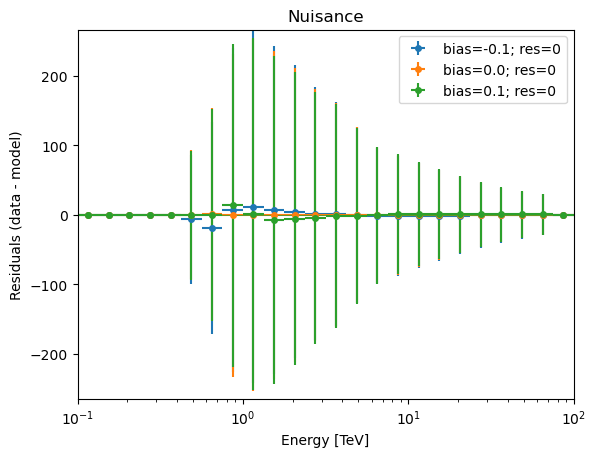

In [17]:
fig, ax = plt.subplots()
i = 0
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for b in biass:
    for s in sigmass:
        d = datasets_conv_N[i]
        d.plot_residuals_spectral(ax =ax, color= colors[i], 
                    label = f"bias={b}; res={s}")
        i += 1
ax.legend()
plt.title("Nuisance")

fig.savefig(f"plots/2_Residual_post_fit.svg")

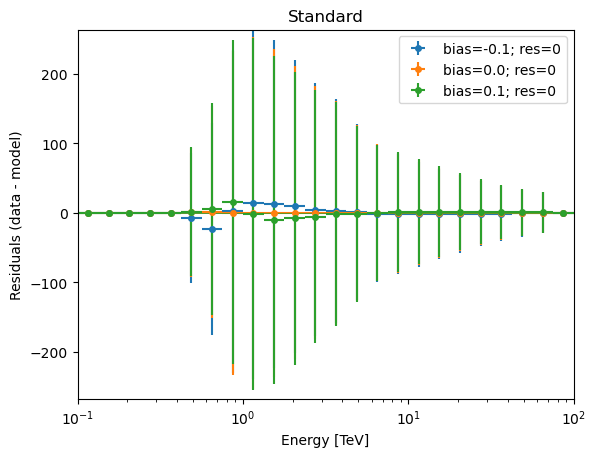

In [18]:
fig, ax = plt.subplots()
i = 0
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for b in biass:
    for s in sigmass:
        d = datasets_conv[i]
        d.plot_residuals_spectral(ax =ax, color= colors[i], 
                    label = f"bias={b}; res={s}")
        i += 1
ax.legend()
plt.title("Standard")
fig.savefig(f"plots/2_Residual_post_fit_standard.svg")

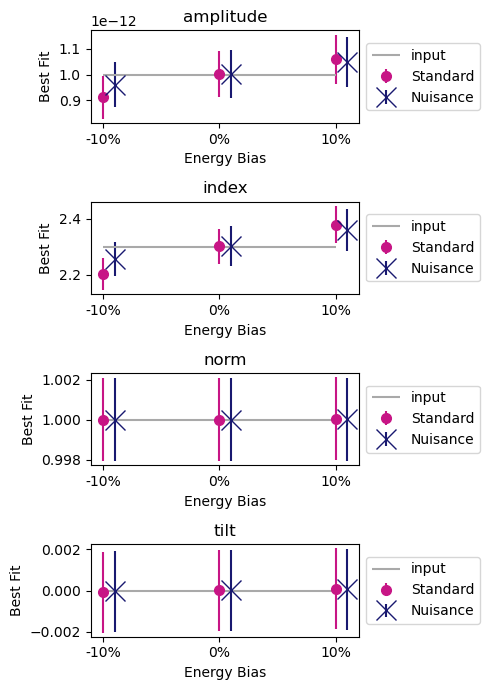

In [19]:
fig, axs = plt.subplots(4,1, figsize= (5, 7))
ax = axs.flatten()

axs[0].set_title("BKG Norm")
axs[1].set_title("BKG Tilt")
axs[2].set_title("Signal Amplitude")
axs[3].set_title("Signal Index")

parnames = ['amplitude', 'index', 'norm', 'tilt']
ii =0;
for b in biass:
    for s in sigmass:
        d = datasets_conv[ii]
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(ii, value, yerr = error, fmt = 'o', color = color_standard,markersize = 7,
                          label = f'Standard')
        
        d = datasets_conv_N[ii]
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar((ii+0.1), value, yerr = error, fmt = 'x', color = color_nui,markersize=14,
                          label ="Nuisance")
            
        ii +=1
labels_sys = [ '-10%', '0%', '10%']
for i, p in enumerate(parnames):
    value = dataset_asimov.models.parameters[p].value
    error = dataset_asimov.models.parameters[p].error    
    #ax[i].errorbar(4, value, yerr = error, fmt = 'x')
    ax[i].hlines( value, 0, len(labels_sys)-1, label = "input", color= 'darkgrey')
    ax[i].set_title(p)
    
    
for ax in ax:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), ncol = 1, 
            loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Best Fit'); 
    ax.set_xlabel('Energy Bias'); 
    ax.set_xticks(np.arange(len(labels_sys)),labels_sys)
    
plt.tight_layout()
fig.savefig(f"plots/2_Best_fit_parameters.svg")
    

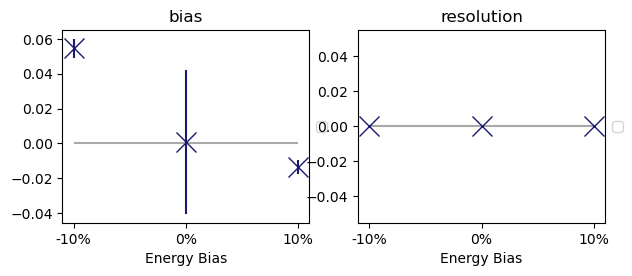

In [20]:
fig,ax  = plt.subplots(1,2,figsize= (7, 2.5))
ax = ax.flatten()
parnames = ['bias', 'resolution',]
labels_sys = []

ii =0;
for b in biass:
    for s in sigmass:
        d = datasets_conv_N[ii]
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(ii, value, yerr = error, fmt = 'x', color = color_nui,markersize=14,)
            ax[i].set_title(p)
            
        labels_sys.append(f'B={b};\n R={s};')
            
            
        ii +=1
        
labels_sys = [ '-10%', '0%', '10%']
for i, p in enumerate(parnames):
    value = 0
    #ax[i].errorbar(4, value, yerr = error, fmt = 'x')
    ax[i].hlines( value, 0, len(labels_sys)-1,  color= 'darkgrey')
    ax[i].set_title(p)
    
    
for ax in ax:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), ncol = 1, 
            loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('Energy Bias'); 
    ax.set_xticks(np.arange(len(labels_sys)),labels_sys)
fig.savefig(f"plots/2_Best_fit_nui_parameters.svg")
    

In [21]:
datasets_conv_N[1].models.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,is_penalised,link
str12,str13,float64,str14,float64,float64,float64,bool,bool,bool,str1
spectral,index,2.3015e+00,,7.230e-02,nan,nan,False,False,False,
spectral,amplitude,1.0023e-12,cm-2 s-1 TeV-1,9.395e-14,nan,nan,False,True,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
spatial,lon_0,8.3631e+01,deg,0.000e+00,nan,nan,True,False,False,
spatial,lat_0,2.2018e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,False,
spatial,sigma,1.9177e-02,deg,1.106e-02,0.000e+00,nan,False,False,False,
spatial,e,0.0000e+00,,0.000e+00,0.000e+00,1.000e+00,True,False,False,
spatial,phi,0.0000e+00,deg,0.000e+00,nan,nan,True,False,False,
spectral,norm,1.0000e+00,,2.066e-03,nan,nan,False,True,False,
